In [2]:
import netCDF4
from netCDF4 import num2date
import numpy as np
import os
import pandas as pd
import glob
 
# Writing all .nc files in directory to individual named csv files
all_dirs = glob.glob(r'C:\PATH_TO_FILES\NetCDFs\pr\*.nc')

all_filenames = os.listdir(r'C:\PATH_TO_FILES\NetCDFs\pr')

output_dir = (r'C:\PATH_TO_FILES\NetCDFs\pr')

for f in all_filenames:
        for d in all_dirs:
            f = netCDF4.Dataset(d)
            var = f.variables['mean']
            time_dim, level_dim, lat_dim, lon_dim = var.get_dims()
            time_var = f.variables[time_dim.name]
            latitudes = f.variables[lat_dim.name][:]
            longitudes = f.variables[lon_dim.name][:]
            filename = str(d+'.csv')
            latitudes_grid, longitudes_grid = [
                x.flatten() for x in np.meshgrid(latitudes, longitudes, indexing='ij')]
            df = pd.DataFrame({
                'latitude': latitudes_grid,
                'longitude': longitudes_grid,
                'var': var[:].flatten()})
            df.to_csv(filename, index=False)

In [19]:
# Concatenate all csv files for variable into one live dataframe with reference column containing metadata

df = pd.DataFrame()

all_csvs = glob.glob(r'C:\PATH_TO_FILES\NetCDFs\pr\*.csv')

for c in all_csvs:
    temp_df = pd.read_csv(c)
    temp_df['filename'] = str(c)
    df = df.append(temp_df)
    
df['filename'] = df['filename'].str[-30:]
df['filename'] = df['filename'].str[:24]
df['variable'] = df['filename'].str[5:7]
df['scenario'] = df['filename'].str[8:13]
df['timeframe'] = df['filename'].str[14:23]
df.head(10)

# option to write to master csv file; 
# df.to_csv(r'C:\PATH_TO_FILES\NetCDFs\pr\pr_all.csv')

,latitude,longitude,var,filename,variable,scenario,timeframe
0,-88.75,1.25,0.148791,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
1,-88.75,3.75,0.148272,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
2,-88.75,6.25,0.148386,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
3,-88.75,8.75,0.147796,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
4,-88.75,11.25,0.146259,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
5,-88.75,13.75,0.144692,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
6,-88.75,16.25,0.143356,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
7,-88.75,18.75,0.142180,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
8,-88.75,21.25,0.142341,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010
9,-88.75,23.75,0.143404,mean_pr_rcp26_1981-2010.,pr,rcp26,1981-2010


In [33]:
## sense checking the output dataframe

df.shape

(248832, 7)

In [34]:
df.groupby("scenario")["timeframe"].count()

scenario
rcp26    62208
rcp45    62208
rcp60    62208
rcp85    62208
Name: timeframe, dtype: int64

In [35]:
df.groupby('timeframe')['scenario'].count()

timeframe
1981-2010    41472
2026-2055    41472
2036-2065    41472
2046-2075    41472
2056-2085    41472
2066-2095    41472
Name: scenario, dtype: int64

In [36]:
df.groupby('scenario')['var'].mean()

scenario
rcp26    2.487508
rcp45    2.517377
rcp60    2.509138
rcp85    2.542828
Name: var, dtype: float64

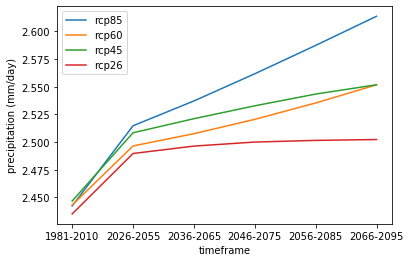

In [41]:
df[df["scenario"]=='rcp85'].groupby('timeframe')['var'].mean().plot()
df[df["scenario"]=='rcp60'].groupby('timeframe')['var'].mean().plot()
df[df["scenario"]=='rcp45'].groupby('timeframe')['var'].mean().plot()
df[df["scenario"]=='rcp26'].groupby('timeframe')['var'].mean().plot()
plt.ylabel('precipitation (mm/day)')
plt.legend(['rcp85', 'rcp60', 'rcp45', 'rcp26'])